### Read Data

In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import random


In [ ]:
offense = pd.read_csv('/content/drive/MyDrive/MLC/NYPD_Complaint_Data_Current__Year_To_Date_.csv')

In [ ]:
offense.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,903695881,69,NaN,12/17/2021,22:13:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1011203,174515,40.645647,-73.902876,"(40.64564719600002, -73.90287588699994)",POINT (-73.90287588699994 40.64564719600002)
1,400462399,113,NaN,12/17/2021,06:21:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,F,1043252,187998,40.682499,-73.787269,"(40.682499421000045, -73.78726915499993)",POINT (-73.78726915499993 40.682499421000045)
2,587910690,113,NaN,12/13/2021,20:05:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1042087,190443,40.689218,-73.791449,"(40.689218058000044, -73.79144856999993)",POINT (-73.79144856999993 40.689218058000044)
3,186105368,52,BRONX,12/07/2021,22:49:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,E,1017088,260895,40.882718,-73.881247,"(40.88271780700006, -73.88124724999993)",POINT (-73.88124724999993 40.88271780700006)
4,185325394,113,NaN,12/06/2021,17:25:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1046176,193100,40.696483,-73.776680,"(40.69648322200004, -73.77667979199998)",POINT (-73.77667979199998 40.69648322200004)


### Data Cleaning

#### Check NA columns

In [ ]:
for i in offense:
  print(i, np.mean(offense[i].isna()))

CMPLNT_NUM 0.0
ADDR_PCT_CD 0.0
BORO_NM 0.0025605887351892965
CMPLNT_FR_DT 0.0
CMPLNT_FR_TM 0.0
CMPLNT_TO_DT 0.08918679617179748
CMPLNT_TO_TM 0.08884864718157266
CRM_ATPT_CPTD_CD 0.0003581709699091892
HADEVELOPT 0.9964917042264174
HOUSING_PSA 0.927513759549372
JURISDICTION_CODE 0.0010745129097275675
JURIS_DESC 0.0
KY_CD 0.0
LAW_CAT_CD 0.0
LOC_OF_OCCUR_DESC 0.16521025303332992
OFNS_DESC 2.0021979684364615e-05
PARKS_NM 0.9928988712052786
PATROL_BORO 0.0010745129097275675
PD_CD 0.0010745129097275675
PD_DESC 0.0010745129097275675
PREM_TYP_DESC 0.002825323799904784
RPT_DT 0.0
STATION_NAME 0.9800314122614604
SUSP_AGE_GROUP 0.19606857305575454
SUSP_RACE 0.19606857305575454
SUSP_SEX 0.19606857305575454
TRANSIT_DISTRICT 0.9800314122614604
VIC_AGE_GROUP 0.0
VIC_RACE 0.00018019781715928153
VIC_SEX 0.0
X_COORD_CD 0.0
Y_COORD_CD 0.0
Latitude 0.0
Longitude 0.0
Lat_Lon 0.0
New Georeferenced Column 0.0


#### Drop NA column, Datetime column since it cannot be used in tree model. Transform Date time to hours and day of week

In [ ]:
offense1 = offense
offense1['CMPLNT_FR_TM'] = pd.to_datetime(offense['CMPLNT_FR_TM'])
offense1['hour'] = offense['CMPLNT_FR_TM'].dt.hour


offense1['CMPLNT_FR_DT'] = pd.to_datetime(offense['CMPLNT_FR_DT'], errors = 'coerce')
offense1['dow'] = offense1['CMPLNT_FR_DT'].dt.dayofweek

offense1 = offense1.drop('HADEVELOPT', axis=1)
offense1 = offense1.drop('HOUSING_PSA', axis=1)
offense1 = offense1.drop('TRANSIT_DISTRICT', axis=1)
offense1 = offense1.drop('PARKS_NM', axis=1)
offense1 = offense1.drop('CMPLNT_TO_DT', axis=1)
offense1 = offense1.drop('CMPLNT_TO_TM', axis=1)
offense1 = offense1.drop('LOC_OF_OCCUR_DESC', axis=1)
offense1 = offense1.drop('BORO_NM', axis=1)
offense1 = offense1.drop('CMPLNT_FR_TM', axis=1)
offense1 = offense1.drop('CMPLNT_FR_DT', axis=1)
offense1 = offense1.drop('Lat_Lon', axis=1)
offense1 = offense1.drop('New Georeferenced Column', axis=1)


In [ ]:
offense2 = offense1[offense1['LAW_CAT_CD']!= 'MISDEMEANOR']

In [ ]:
offense2 = offense2[offense2['SUSP_RACE']!= 'UNKNOWN']

In [ ]:
#offense2.loc[offense2['SUSP_RACE'] == 'WHITE HISPANIC', 'SUSP_RACE'] = 'HISPANIC'
#offense2.loc[offense2['SUSP_RACE'] == 'BLACK HISPANIC', 'SUSP_RACE'] = 'HISPANIC'


In [ ]:
np.mean(offense2.dropna()['SUSP_RACE'] == 'HISPANIC')

0.0

### Decision Tree

In [ ]:
# your code here
from sklearn.model_selection import train_test_split
# remove records with any missing values
data=offense2.dropna()

# Take "BurdenOfDisease" as the target variable. 
y=data.loc[:,"SUSP_RACE"]

# Get the feature space. 
X=data.drop('SUSP_RACE', axis=1)
X=pd.get_dummies(X)

# Split data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.head()

,CMPLNT_NUM,ADDR_PCT_CD,JURISDICTION_CODE,KY_CD,PD_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,hour,...,VIC_RACE_ASIAN / PACIFIC ISLANDER,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,VIC_RACE_UNKNOWN,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_SEX_D,VIC_SEX_E,VIC_SEX_F,VIC_SEX_M
111,802228793,47,1.0,106,109.0,1020990,256795,40.871449,-73.867159,2,...,0,0,0,0,0,1,0,0,1,0
279,197150433,52,1.0,578,638.0,1011612,253618,40.862763,-73.901080,13,...,0,0,0,0,0,1,0,0,1,0
288,830151253,13,1.0,121,269.0,988663,210090,40.743332,-73.984076,2,...,0,0,0,1,0,0,1,0,0,0
318,462468770,78,1.0,578,637.0,989360,182242,40.666896,-73.981582,7,...,0,0,0,0,0,1,0,0,1,0
585,746006642,52,1.0,105,386.0,1010831,252019,40.858377,-73.903910,17,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# learn model
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

# in sample accuracy
print('In sample accuracy:',dt.score(X_train,y_train))

# out of sample accuracy
print('Out of sample accuracy:',dt.score(X_test,y_test))

In sample accuracy: 1.0
Out of sample accuracy: 0.6193548387096774


In [ ]:
np.mean(dt.predict(X_train) == 'BLACK HISPANIC')

0.08767881864328565

In [ ]:
y.unique()

array(['HISPANIC', 'BLACK', 'WHITE', 'ASIAN / PACIFIC ISLANDER',
       'AMERICAN INDIAN/ALASKAN NATIVE'], dtype=object)

#### Select hyperparam by accuracy

In [ ]:
OS=[]
for i in range(2,500,25):
    dt=DecisionTreeClassifier(max_leaf_nodes=i, random_state=42)
    dt.fit(X_train,y_train)
    print("with ", i, "max leaf nodes, the test accuracy is ", dt.score(X_test,y_test))
    OS.append(dt.score(X_test,y_test))

with  2 max leaf nodes, the test accuracy is  0.6731182795698925
with  27 max leaf nodes, the test accuracy is  0.6666666666666666
with  52 max leaf nodes, the test accuracy is  0.6720430107526881
with  77 max leaf nodes, the test accuracy is  0.6666666666666666
with  102 max leaf nodes, the test accuracy is  0.6559139784946236
with  127 max leaf nodes, the test accuracy is  0.6591397849462366
with  152 max leaf nodes, the test accuracy is  0.6580645161290323
with  177 max leaf nodes, the test accuracy is  0.646236559139785
with  202 max leaf nodes, the test accuracy is  0.6451612903225806
with  227 max leaf nodes, the test accuracy is  0.6430107526881721
with  252 max leaf nodes, the test accuracy is  0.635483870967742
with  277 max leaf nodes, the test accuracy is  0.624731182795699
with  302 max leaf nodes, the test accuracy is  0.621505376344086
with  327 max leaf nodes, the test accuracy is  0.6225806451612903
with  352 max leaf nodes, the test accuracy is  0.624731182795699
with 

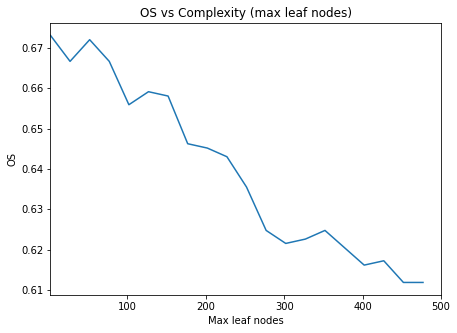

In [ ]:
# your code here
import matplotlib.pylab as plt
plt.figure(figsize=(7,5))
plt.plot(range(2,500,25),OS)
plt.xlabel("Max leaf nodes")
plt.ylabel("OS")
plt.title("OS vs Complexity (max leaf nodes)")
plt.xlim(2,500)
plt.show()

#### Select hyperparam by crossvalidation

In [ ]:
# your code here
from sklearn.model_selection import GridSearchCV

param_grid = {'max_leaf_nodes':range(2,500,25)}
dt=DecisionTreeClassifier(random_state=42)
gr=GridSearchCV(dt,param_grid=param_grid,scoring='accuracy')
rs=gr.fit(X_train,y_train)
print(rs.best_params_)
print(rs.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'max_leaf_nodes': 27}
0.6666666666666666


#### Visualize model

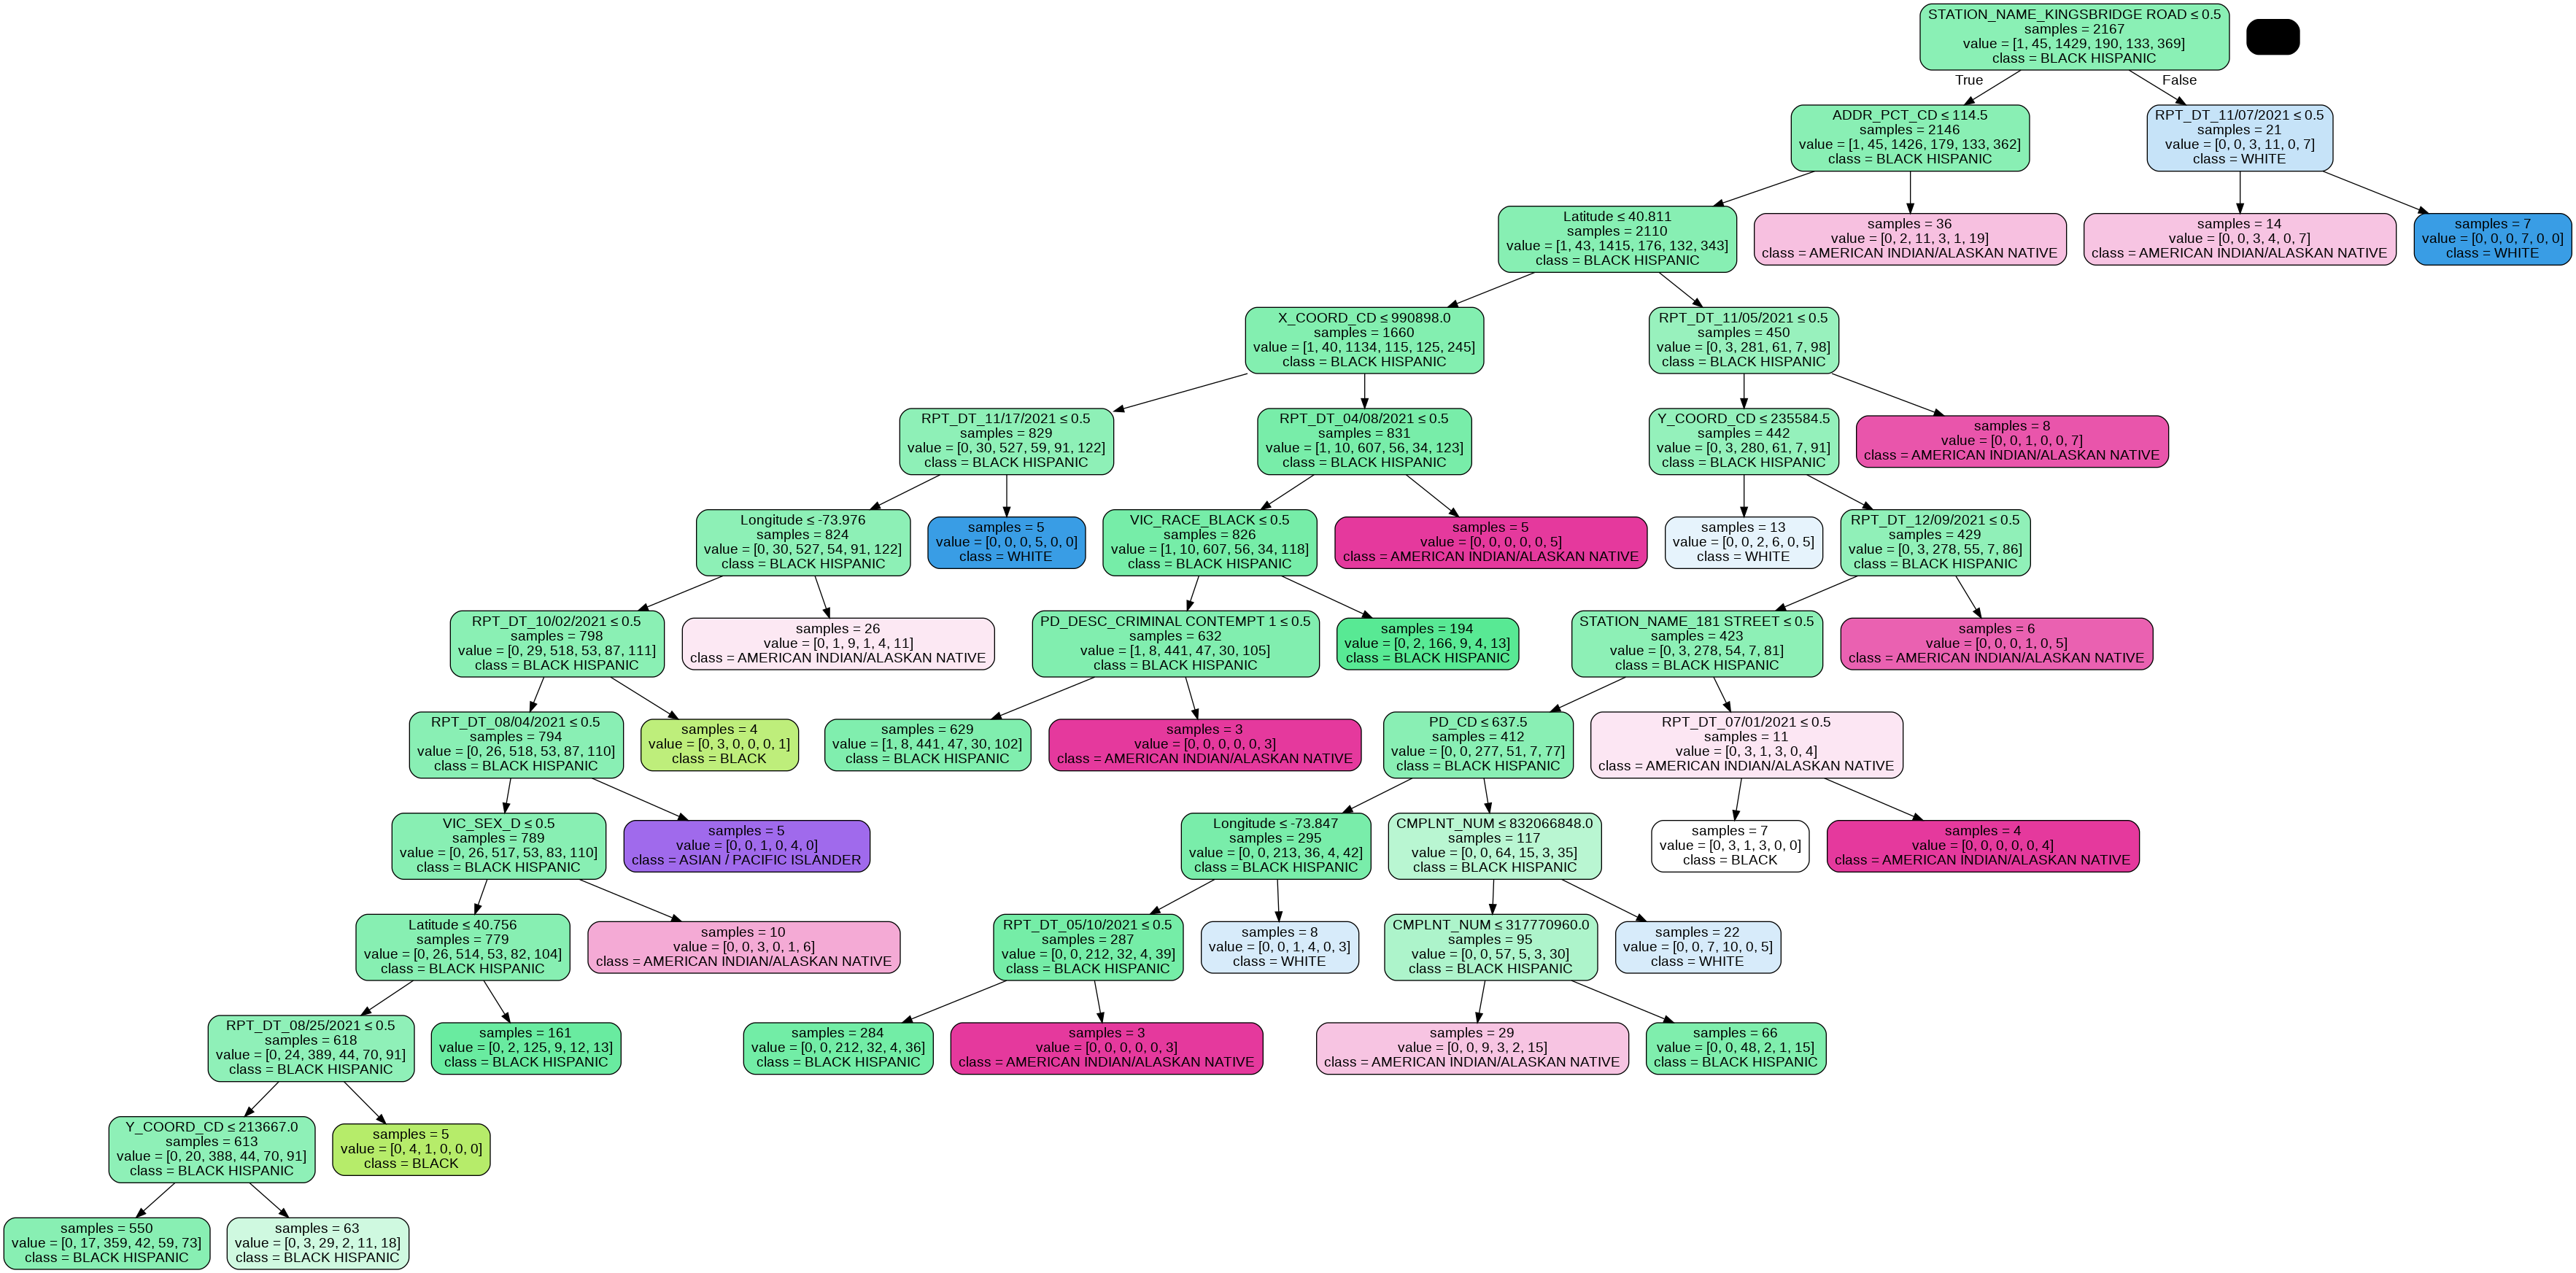

In [ ]:
# your code here
from sklearn import tree

dt = DecisionTreeClassifier(max_leaf_nodes=27) # just to keep it simple for visualization
dt.fit(X_train,y_train)

# This will only work if GraphViz is installed on your machine
from sklearn import tree
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=y.unique(),  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

### Random Forest

In [ ]:
# your code here
# same training data as above
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=27, random_state=42)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]
print(rf.score(X_test,y_test))

0.6774193548387096


#### Loop 

In [ ]:
OS=[]
for i in range(1,100,5):
    rf = RandomForestClassifier(n_estimators=i, n_jobs=-1,max_leaf_nodes=27, random_state=42)
    rf.fit(X_train, y_train)
    pred=rf.predict_proba(X_test)[:,1]
    OS.append(rf.score(X_test,y_test))
    print("with ", i, "n estimators, the test accuracy is ", rf.score(X_test,y_test))


with  1 n estimators, the test accuracy is  0.6559139784946236
with  6 n estimators, the test accuracy is  0.6774193548387096
with  11 n estimators, the test accuracy is  0.678494623655914
with  16 n estimators, the test accuracy is  0.6806451612903226
with  21 n estimators, the test accuracy is  0.678494623655914
with  26 n estimators, the test accuracy is  0.678494623655914
with  31 n estimators, the test accuracy is  0.6774193548387096
with  36 n estimators, the test accuracy is  0.6774193548387096
with  41 n estimators, the test accuracy is  0.6774193548387096
with  46 n estimators, the test accuracy is  0.6763440860215054
with  51 n estimators, the test accuracy is  0.6763440860215054
with  56 n estimators, the test accuracy is  0.6763440860215054
with  61 n estimators, the test accuracy is  0.6763440860215054
with  66 n estimators, the test accuracy is  0.6763440860215054
with  71 n estimators, the test accuracy is  0.6763440860215054
with  76 n estimators, the test accuracy is  

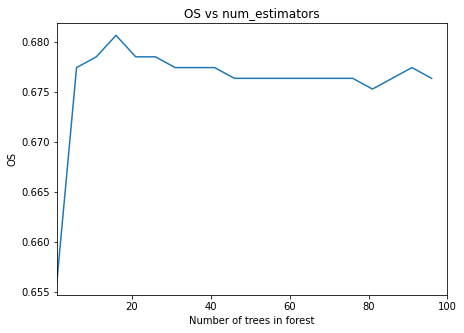

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(range(1,100,5),OS)

plt.xlabel("Number of trees in forest")
plt.ylabel("OS")
plt.title("OS vs num_estimators")
plt.xlim(1,100)
plt.show()

#### CV

In [ ]:
param_grid = {'n_estimators':range(1,100,5)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=27, random_state = 42)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='accuracy')
rs = gs.fit(X_train,y_train)
pred=rs.predict_proba(X_test)[:,1]
print(rs.best_params_)
print(rs.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'n_estimators': 11}
0.678494623655914
